# step 1 initial exploration of dataset

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('C:/Users/samsung/Desktop/Indicators.csv')
data.shape

(5656458, 6)

In [4]:
data.head(10)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06
5,Arab World,ARB,Arms imports (SIPRI trend indicator values),MS.MIL.MPRT.KD,1960,5.380000e+08
6,Arab World,ARB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,4.769789e+01
7,Arab World,ARB,CO2 emissions (kt),EN.ATM.CO2E.KT,1960,5.956399e+04
8,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,6.439635e-01
9,Arab World,ARB,CO2 emissions from gaseous fuel consumption (%...,EN.ATM.CO2E.GF.ZS,1960,5.041292e+00


# How many UNIQUE country names are there?

In [5]:
countries=data['CountryName'].unique() #tolist = converts data into list
len(countries)

247

In [6]:
# How many unique country codes are there? (should be the same)
countryCodes=data['CountryCode'].unique()
len(countryCodes)

247

# Are ther many indicators or few?

In [7]:
# How many unique indicators are there
indicators=data['IndicatorName'].unique().tolist()
len(indicators)

1344

# How many years of data do we have?

In [8]:
years=data['Year'].unique().tolist()
len(years)

56

# what's the range of years?

In [9]:
print(str(min(years))+ 'to' +str(max(years)))

1960to2015


#Matplotlib: Basic Plotting Part1

# lets pick country and an indicator to explore CO2 emission per capita and USA

In [10]:
# select CO2 emissions for the USA
hist_indicator='CO2 emissions \(metric'
hist_country='USA'
mask1=data['IndicatorName'].str.contains(hist_indicator)
mask2=data['CountryCode'].str.contains(hist_country)
#stage is just those indicators matching the USA for country code and co2 emission over time
stage=data[mask1 & mask2]

In [11]:
stage.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22232,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,15.999779
48708,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,15.681256
77087,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,16.013937
105704,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,16.482762
134742,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,16.968119


# let's see how emissions have changed over time using matplotlib

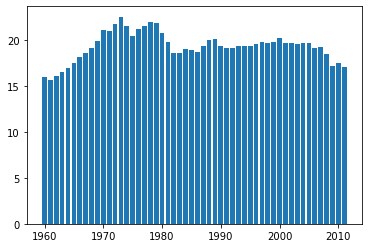

In [12]:
# get the years
years=stage['Year'].values
# get the values
co2=stage['Value'].values
#create
plt.bar(years,co2)
plt.show()

# switch to a line plot

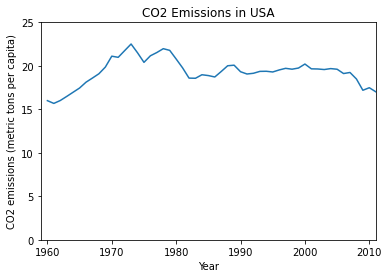

In [13]:
plt.plot(stage['Year'].values,stage['Value'].values)
# label the axes
plt.xlabel('Year')
plt.ylabel(stage['IndicatorName'].iloc[0])
#label the figure
plt.title('CO2 Emissions in USA')
#to make more honest, start the y axis at 0
plt.axis([1959, 2011, 0, 25])
plt.show()

# using Histograms to explore the distribution of value

In [14]:
#lower=stage['Value'].mean()-stage['Value'].std()
#upper=stage['Value'].mean()+stage['Value'].std()
#hist_data=[x for x in stage[:10000]['Value'] if x>lower and x<upper]
# otherwise lets look at all the data
hist_data=stage['Value'].values

In [15]:
print(len(hist_data))

52


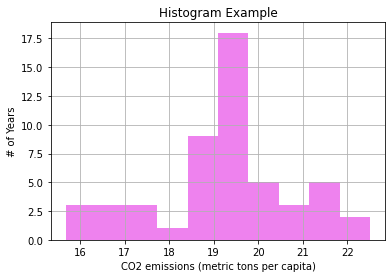

In [16]:
# the histogram of the data
plt.hist(hist_data, 10, density=False, facecolor='violet')
#density= false means our width of bar will be same
plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('# of Years')
plt.title('Histogram Example')
plt.grid(True)
plt.show()

# But how do the USA's numbers relate to those of other countries?

In [17]:
# select CO2 emissions for all countries in 2011
hist_indicator = 'CO2 emissions \(metric'
hist_year = 2011

mask1 = data['IndicatorName'].str.contains(hist_indicator) 
mask2 = data['Year'].isin([hist_year])

# apply our mask
co2_2011 = data[mask1 & mask2]
co2_2011.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5026275,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,4.724500
5026788,Caribbean small states,CSS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,9.692960
5027295,Central Europe and the Baltics,CEB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,6.911131
5027870,East Asia & Pacific (all income levels),EAS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.859548
5028456,East Asia & Pacific (developing only),EAP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.302499


For how many countries do we have CO2 per capita emissions data in 2011

In [18]:
print(len(co2_2011))

232


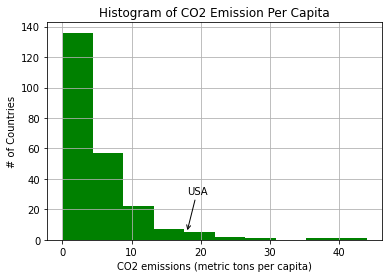

In [19]:
# let's plot a histogram of the emmissions per capita by country

# subplots returns a touple with the figure, axis attributes.
fig, ax=plt.subplots()

ax.annotate('USA',xy=(18,5),xycoords='data',xytext=(18,30),textcoords='data',arrowprops=dict(arrowstyle='->',connectionstyle='arc3'))
plt.hist(co2_2011['Value'],10,density=False,facecolor='green')
#density: width of your bins false will have all same size of bins.
plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('# of Countries')
plt.title('Histogram of CO2 Emission Per Capita')
#plt.axis([10, 22, 0, 14])
plt.grid(True)
plt.show()

So the USA, at ~18 CO2 emissions (metric tons per capital) is quite high among all countries.

An interesting next step, which we'll save for you, would be to explore how this relates to other industrialized nations and to look at the outliers with those values in the 40s!

#Matplotlib: Basic Plotting, Part 2

Relationship between GDP and CO2 Emissions in USA

In [20]:
# select GDP Per capita emissions for the United States
hist_indicator='GDP per capita \(constant 2005'
hist_country='USA'
mask1 = data['IndicatorName'].str.contains(hist_indicator) 
mask2 = data['CountryCode'].str.contains(hist_country)
# stage is just those indicators matching the USA for country code and CO2 emissions over time.
gdp_stage = data[mask1 & mask2]

#plot gdp_stage vs stage

In [21]:
gdp_stage.head(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22282,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,15482.707760
48759,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1961,15578.409657


In [22]:
stage.head(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22232,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,15.999779
48708,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,15.681256


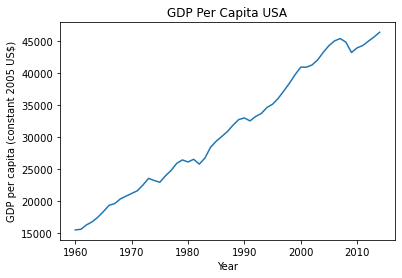

In [23]:
# switch to a line plot
plt.plot(gdp_stage['Year'].values,gdp_stage['Value'].values)
# Label the axes
plt.xlabel('Year')
plt.ylabel(gdp_stage['IndicatorName'].iloc[0])
#label the figure
plt.title('GDP Per Capita USA')
# to make more honest, start they y axis at 0
#plt.axis([1959, 2011,0,25])
plt.show()

So although we've seen a decline in the CO2 emissions per capita, it does not seem to translate to a decline in GDP per capita

#ScatterPlot for comparing GDP against CO2 emissions (per capita)

In [24]:
print('GDP Min Year= ',gdp_stage['Year'].min(),'max:',gdp_stage['Year'].max())
print('CO2 Min Year= ',stage['Year'].min(),'max',stage['Year'].max())

GDP Min Year=  1960 max: 2014
CO2 Min Year=  1960 max 2011


We have 3 extra years of GDP data, so let's trim those off so the scatterplot has equal length arrays to compare (this is actually required by scatterplot)

In [ ]:
%matplotlib inline
import maplotlib.pyplot as plt
